# Mini project №4
### Time and Pivot tables

### Tasks

1) Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

2) Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

3) Сколько транзакций завершились ошибкой?

4) Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

5) Коллега прислал Вам обновленные данные. (transaction_data_updated.csv).

       Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.


6) Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.

        Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

#### METADATA
        date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
        name – имя пользователя
        transaction – статус транзакции
        minute* – сколько минут прошло с начала дня

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Task_1:
1) Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [2]:
path = 'C://Users/user/Karpov_courses/Mini_projects/Mini_pj_4/transaction_data.csv'
transaction = pd.read_csv(path)

In [3]:
transaction.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [9]:
print('Размер таблицы:',transaction.shape)

Размер таблицы: (5315, 3)


In [10]:
transaction.dtypes

date           object
name           object
transaction    object
dtype: object

In [19]:
transaction.isna().sum()
# число пропущенных значений

date           0
name           0
transaction    0
dtype: int64

In [18]:
print('Число дубликатов в таблице:',sum(transaction.duplicated()))

Число дубликатов в таблице: 0


In [6]:
transaction.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


### Task_2:
2) Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

        Подумайте, как можно улучшить график.

In [181]:
transaction.transaction.value_counts()

transaction
successfull    3692
cancelled      1619
error             4
Name: count, dtype: int64

<Axes: xlabel='transaction', ylabel='count'>

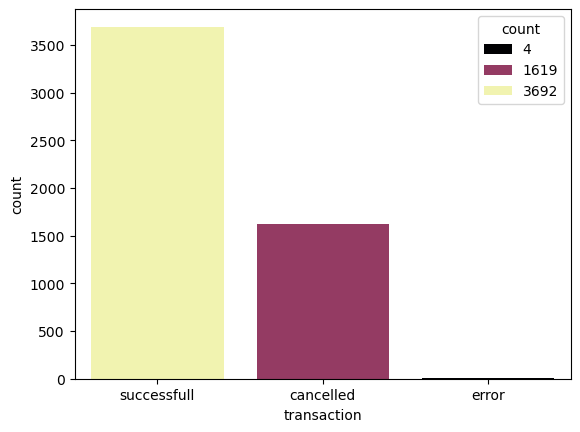

In [180]:
transaction_distribution = transaction.transaction.value_counts()
sns.barplot( x = transaction_distribution.index, y = transaction_distribution, palette= 'inferno', hue= transaction_distribution)

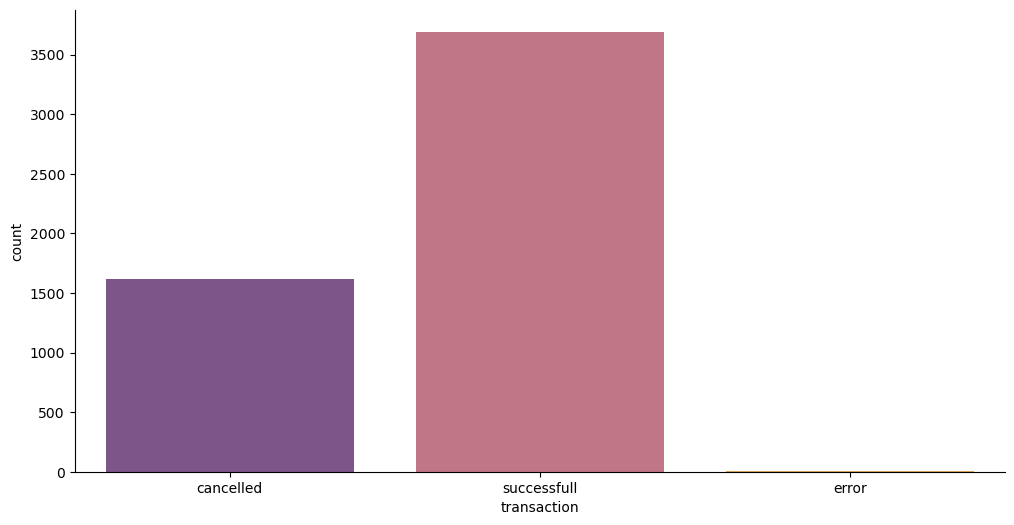

In [41]:
plt.figure(figsize= (12,6))                  # задать масштаб графику
ax = sns.countplot(data = transaction, x = 'transaction', hue= 'transaction', palette= 'inferno', alpha = 0.75)  
sns.despine()     

### Task_3:
3) Сколько транзакций завершились ошибкой?

In [43]:
transaction.transaction.value_counts()

transaction
successfull    3692
cancelled      1619
error             4
Name: count, dtype: int64

In [182]:
# Вариант 2, конкретнее 
transaction.transaction[transaction.transaction == 'error'].count()

4

### Task_4:
4) Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

In [198]:
successfull_deals = transaction\
                        [transaction.transaction == 'successfull']\
                        .groupby('name')\
                        .agg({'name':'count'})\
                        .rename(columns={'name':'count'})\
                        .sort_values('count', ascending= False)#\
                        # .reset_index(drop)
successfull_deals

,count
name,
Svetlana_Smirnova,82
Olga_Smirnova,80
Masha_Ozerova,80
Svetlana_Ivanova,79
Svetlana_Polyanova,78
Masha_Polyanova,78
Ekaterina_Smirnova,77
Lolita_Ivanova,76
Irina_Lesnova,76


C:\Users\user\AppData\Local\Temp\ipykernel_26036\1786369017.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(successfull_deals, kde = False)


<Axes: >

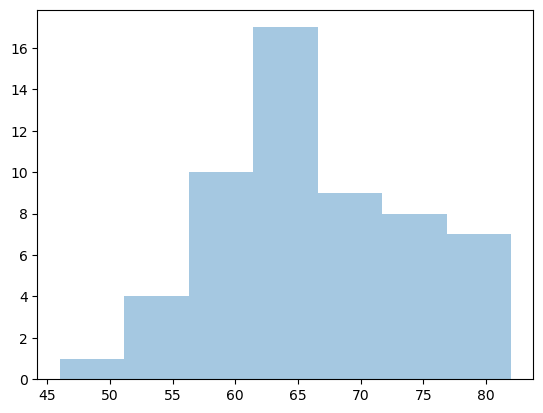

In [202]:
# Вариант 2 - дистплот (распределение)
sns.distplot(successfull_deals, kde = False)
# kde = False - отображает на гистограмме численное выражение по оси "у")
# kde = True - вероятностное выражение (в долях встречаемости по оси "у")

In [204]:
successfull_deals.describe()

,count
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


C:\Users\user\AppData\Local\Temp\ipykernel_26036\2765324742.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(successfull_deals)


<Axes: ylabel='Density'>

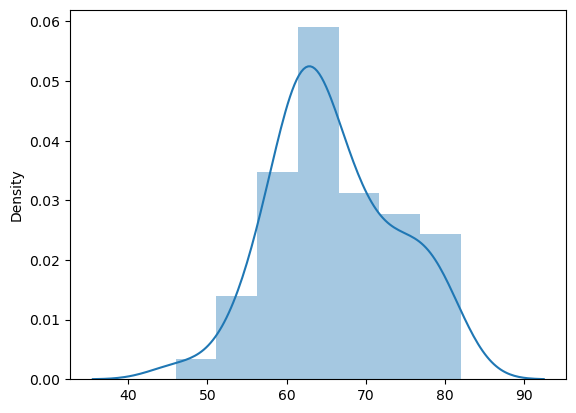

In [203]:
# Вариант 2 - дистплот (распределение)
sns.distplot(successfull_deals)
# kde = True - вероятностное выражение (в долях встречаемости по оси "у")

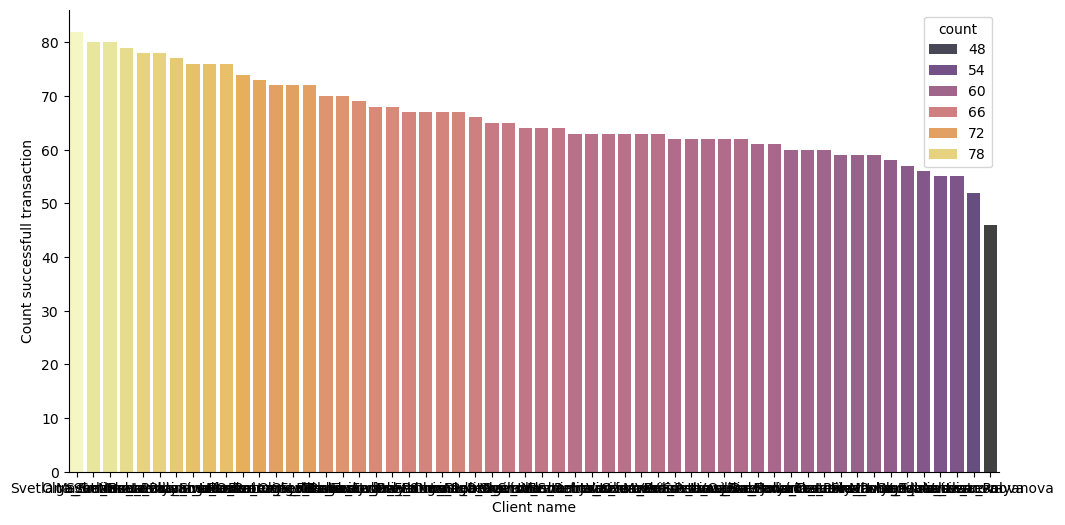

In [78]:
# Барплот: количество успешного завершения транзакций по клиентам - не информативно(

plt.figure(figsize= (12,6))                                                             # задать масштаб графику
ax = sns.barplot(successfull_deals, x = 'name', y = 'count', palette= 'inferno', hue = 'count',  alpha = 0.75)   
# hue - оттенок по критерию, palette - задать цветовой паттерн изменения цвета (вне их значений), alpha - прозрачность (0-1)

ax.set(xlabel='Client name', ylabel='Count successfull transaction')                    # названия осей
sns.despine()                                                                           # убрать часть рамки графика

### Task_5:
5) Коллега прислал Вам обновленные данные. (transaction_data_updated.csv).

        Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [150]:
path_2 = 'C://Users/user/Karpov_courses/Mini_projects/Mini_pj_4/transaction_data_updated.csv'
transaction_upd_first = pd.read_csv(path_2)
transaction_upd_first.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [121]:
transaction_upd.date = transaction_upd.date.astype('datetime64[ns]')

In [132]:
transaction_upd = transaction_upd.assign(minutes = transaction_upd.date.dt.minute)

In [207]:
user_vs_minute_pivot = transaction_upd\
                                .groupby(['name', 'minutes'], as_index=False) \
                                .agg({'transaction': 'count'}) \
                                .pivot(index='minutes', columns='name', values='transaction')\
                                .fillna(0)
            # fillna(0) - заполнить пустые значения NaN каким-то значением (в данном случае: 0)

user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minutes,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


In [214]:
# Вариант 2    pivot_table

user_vs_minute_pivot = transaction_upd\
                                .pivot_table(index='minutes', 
                                             columns='name',
                                             values='transaction',
                                             aggfunc= 'count',   # метод агрегации
                                             fill_value = 0
                                            )\
                                # fill_value = 0 - заполнить пустые значения NaN каким-то значением (в данном случае: 0)
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minutes,,,,,,,,,,,,,,,,,,,,,
0,3,4,2,3,4,4,2,1,2,2,...,0,3,1,1,4,1,3,0,0,1
1,4,4,0,4,2,5,4,4,4,3,...,4,5,3,2,3,3,0,0,3,2
2,1,2,4,4,2,1,3,2,3,3,...,4,1,3,3,0,1,2,1,3,1
3,3,0,2,0,5,2,1,3,2,2,...,1,5,5,2,4,0,3,4,1,0
4,3,0,0,3,1,1,2,3,2,1,...,1,2,2,1,1,2,2,3,0,1
5,3,0,2,3,1,0,5,3,1,3,...,0,2,3,1,0,0,3,0,2,1
6,4,1,2,2,0,4,5,2,2,2,...,2,1,4,1,2,4,1,2,0,2
7,3,2,1,2,2,3,4,1,1,3,...,3,1,1,2,4,1,0,1,2,2
8,2,4,3,1,0,3,2,1,1,0,...,0,1,0,1,2,4,2,1,1,1


### Task_6:
6) Изучите представленный график. Помогите коллеге разобраться, есть ли в данных ошибка, или же всё хорошо.

         Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute

<Axes: xlabel='minutes'>

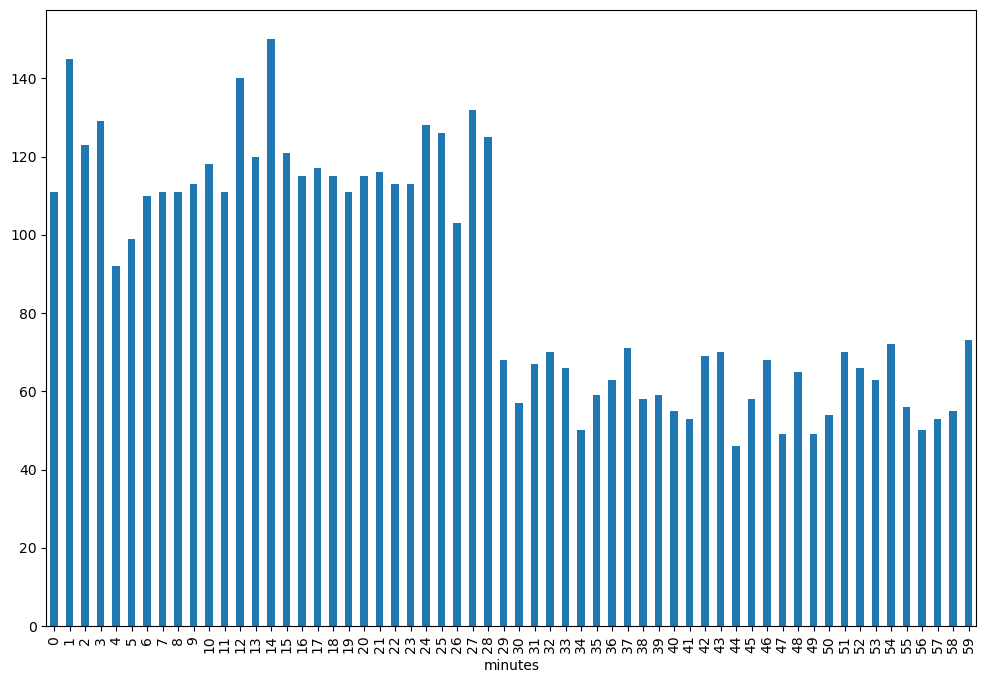

In [220]:
user_vs_minute_pivot.sum(axis = 1).plot.bar(figsize = (12,8))
# sum(axis = 1) - суммировать значения в строке

In [222]:
transaction_upd.head()
# Ошибка графика 
# Пример индекс 2:    1ч6минут а в столбце минуты: 6 минут, тоесть данные о наблюдениях не ограничиваются одинм часом, 
# что приводит к наложению на график данных из следующего часа

,date,name,transaction,minutes
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [224]:
#  исправление ошибки

# transaction_upd['date'] = pd.to_datetime(transaction_upd.date)
transaction_upd.dtypes

date           datetime64[ns]
name                   object
transaction            object
minutes                 int32
dtype: object

In [225]:
transaction_upd['true_minute'] = transaction_upd.date.dt.minute + transaction_upd.date.dt.hour*60

In [227]:
transaction_upd.head()

,date,name,transaction,minutes,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


C:\Users\user\AppData\Local\Temp\ipykernel_26036\1074664544.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction_upd.true_minute, kde = False)


<Axes: xlabel='true_minute'>

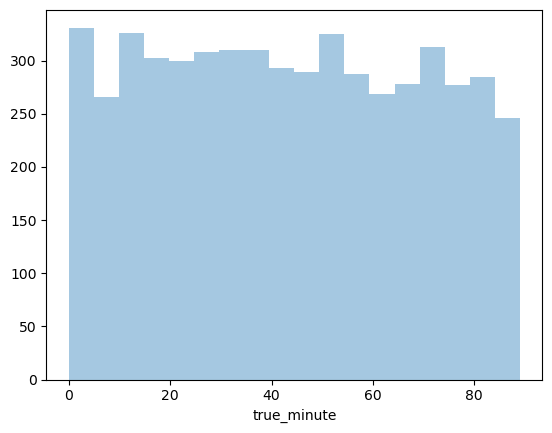

In [233]:
sns.distplot(transaction_upd.true_minute, kde = False)